###  a)  Bacamo kockicu 100 puta, koliko cesto cemo dobiti 6.
###  b)  Eksperiment ponovimo 100000 puta
###  c)  Verovatnoca da je ukupan broj sestica bas 22
###  d)  Ocekivanje - ocekivani broj uspesno dobijenih sestica

In [1]:
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt
import math

100%|██████████| 100000/100000 [00:00<00:00, 182135.67it/s]


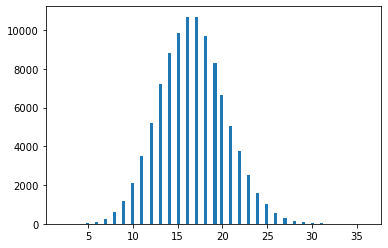

Verovatnoca da je ukupan broj sestica 22 je:  0.03783
Ocekivani broj sestica je:  16.65018


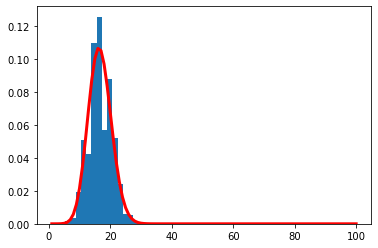

In [6]:
#  a)
n = 100
p = np.random.rand(n)
# br_sestica = len(p[p>5/6])

#  b)
br_eksperimenata = 100000
br_sestica = []
for i in tqdm(range(br_eksperimenata)):
    p = np.random.rand(n)
    br_sestica.append(len(p[p>5/6]))     # da je bilo p>4/5 bila bi verovatnoca da smo dobili 5 ili 6

plt.hist(br_sestica,100)
plt.show()
plt.hist(br_sestica,20,density=True)

#  c)
br_6 = np.array(br_sestica)
print('Verovatnoca da je ukupan broj sestica 22 je: ',len(br_6[br_6==22])/len(br_6))

#  d)
print('Ocekivani broj sestica je: ', np.mean(br_sestica))


#  Teorijska binomna raspodela
p_6 = 1/6
k = np.arange(1,101)         # za svih 100 pokusaja brojimo uspehe
P = np.zeros(n)
for i in range(len(k)):
    P[i] = p_6**k[i] * (1-p_6)**(n-k[i]) * (math.factorial(n)/(math.factorial(k[i]) * math.factorial(n-k[i])))

plt.plot(k, P, 'r', linewidth=3)
plt.show()

### Iz skupa ekstrasolarnih zvezda sa datim efektivnim temperaturama izvuci 100 zvezda. Eksperiment ponoviti   10000 puta tako da je T > 5000K.

100%|██████████| 10000/10000 [00:05<00:00, 1839.08it/s]


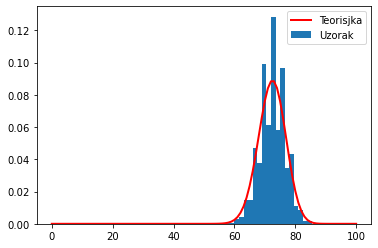

In [7]:
T = np.loadtxt('Exo_stars.txt', delimiter=',', usecols=(1))

br_eksperimenata = 10000
br_uzorka = 100
T_5K = []

for i in tqdm(range(br_eksperimenata)):
    indeksi=[]
    j=0
    while(j<br_uzorka):
        g = np.random.randint(0,len(T))
        if(g not in indeksi):
          indeksi.append(g)
          j = j+1
    uzorak = T[indeksi]
    T_5K.append(len(uzorak[uzorak>5000]))

p = len(T[T>5000])/len(T)
k = np.arange(0, br_uzorka+1)
n = br_uzorka

P = np.zeros(len(k))
for i in range(len(k)):
    P[i] = p**k[i]*(1-p)**(n-k[i])*(math.factorial(n)/(math.factorial(k[i])*math.factorial(n-k[i])))


plt.hist(T_5K,20,density=True, label = 'Uzorak')
plt.plot(k,P,'r',linewidth=2, label='Teorisjka')
plt.legend()
plt.show()
